<a href="https://colab.research.google.com/github/Manasa130306/SCT_ML_1/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manasakilli","key":"6a9bc861b2451a6eef8084af3bd5cb86"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 443MB/s]


In [4]:
!unzip house-prices-advanced-regression-techniques.zip -d data


Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data/data_description.txt  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [5]:
import os
print(os.listdir("data"))


['train.csv', 'sample_submission.csv', 'data_description.txt', 'test.csv']


In [6]:
import pandas as pd

# Load dataset
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

# Preview data
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Column details
train_df.info()

# Missing values check
train_df.isnull().sum().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


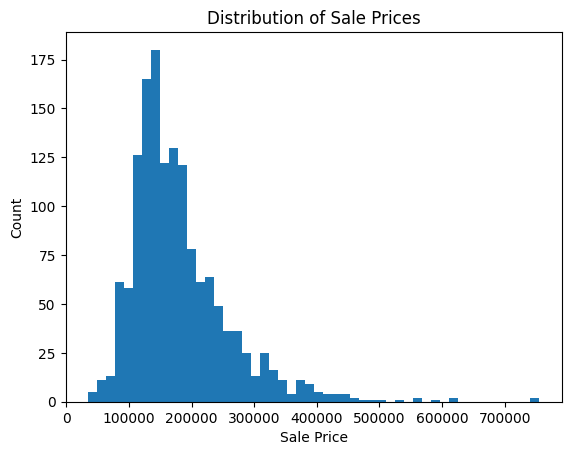

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_df["SalePrice"], bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Prices")
plt.show()


In [10]:

missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(20))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [19]:
# Combine train + test for consistent encoding
all_data = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0)
all_data = pd.get_dummies(all_data)

# Split back
X = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df["SalePrice"]


In [20]:
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
imputer = SimpleImputer(strategy="median")

X[num_cols] = imputer.fit_transform(X[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])


/tmp/ipython-input-1982562639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = imputer.fit_transform(X[num_cols])
/tmp/ipython-input-1982562639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = imputer.transform(X_test[num_cols])


In [21]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)


RandomForestRegressor(random_state=42)

In [22]:
test_preds = final_model.predict(X_test)


In [23]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission_task1.csv", index=False)


In [24]:
from google.colab import files
files.download("submission_task1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>